### Matplotlib CheatSheet part 1
-----------------------

#### Goal:

To provide ready to use, out of the box templates to leverage the use of Matplotlib and Seaborn.

In [1]:
# Required libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import datetime as dt
import matplotlib as mpl
import pandas as pd
plt.style.use('classic')

In [2]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

### Basic plotting using subplots
---------------------------

In [3]:
np.random.seed(42)

In [4]:
x = [1,2,3,4]
y = [5,4,3,2]

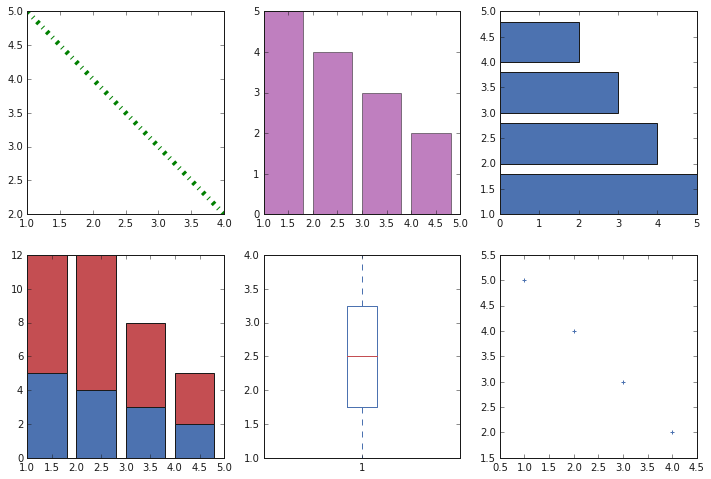

In [5]:
#This plot is composed by 6 different subplots
# Notation
# (# of rows, # of columns, subplot #) 
plt.figure(figsize=(12,8))
# Basic plot line
plt.subplot(231)
plt.plot(x,y, linewidth = 5, color = 'green', ls='-.');
# Bar Chart
plt.subplot(232)
plt.bar(x,y, color = 'purple', alpha = 0.5);
# Horizontal Bar Chart
plt.subplot(233)
plt.barh(x,y);
# Stack Bar Chart
plt.subplot(234)
plt.bar(x,y);
# here it stacks the y & y1 values where y is at the bottom
y1 = [7,8,5,3]
plt.bar(x,y1,bottom = y, color = 'r');
# Box plot 
plt.subplot(235)
plt.boxplot(x);
# Scatter plot
plt.subplot(236)
plt.scatter(x,y,marker = '+');

In [6]:
dataset = [113,115,119,121,124,
          124,125,126,126,126,
          127,127,128,129,130,
          130,131,132,133,136]

In [7]:
len(dataset[4:])

16

### Boxplot:
-------------

Let us compare a boxplot vs. a histogram or a line chart and view the benefits of using boxplots

<ul>
    <li>Box: Rectangle that covers the interquartile range</li>
    <li>Median: Represented by the line inside the box</li>
    <li>Whiskers: Vertical lines extending to the most extreme values (excluding outliers)</li>
    <li>Fliers: Points beyond the whiskers, which are considered outliers</li>
</ul>

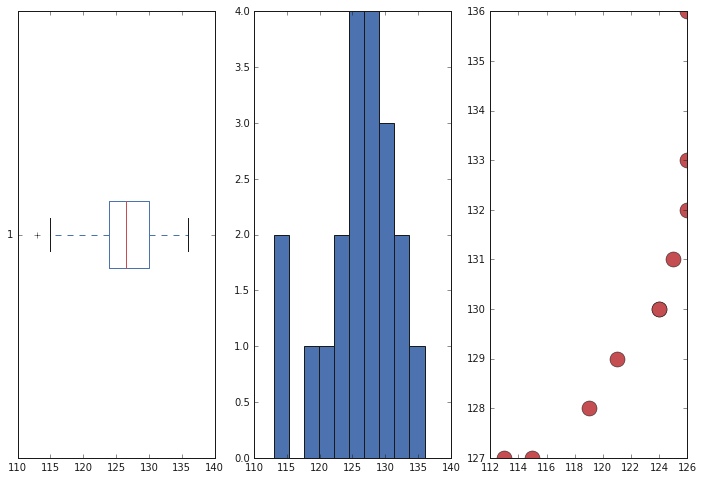

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.boxplot(dataset, vert=False);
# Visualization comparison vs Histogram
plt.subplot(132)
plt.hist(dataset);
# Visualization comparison vs standard plot
plt.subplot(133)
plt.plot(dataset[:10],dataset[10:],'ro',ms= 15);

### Production level charts
-----------------------------------

Out of the box charts are relatively straigh forward, nevertheless for production level visualizations, several layers of customization should be consider. 

### Axis shapes & Latex syntax
------------------------------------------

In [9]:
# Extremely useful tool to generate data points to populate your charts!
x = np.linspace(-np.pi,np.pi,256)
y = np.cos(x)
y1 = np.sin(x)

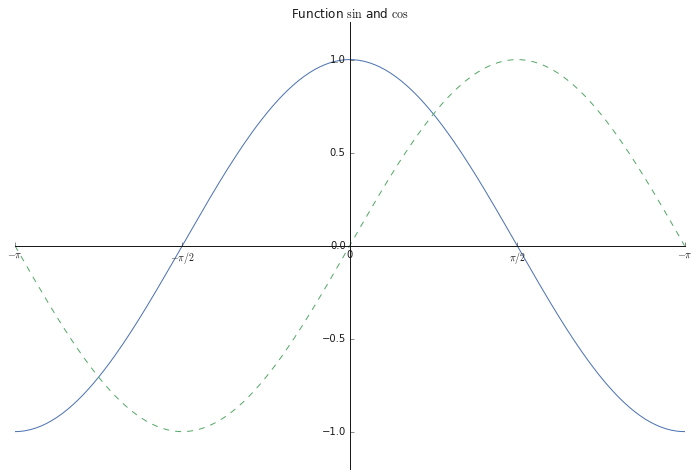

In [10]:
fig = plt.figure(figsize=(12,8))
# -------------
# Axis configuration 
ax = fig.add_subplot(1,1,1)
# hide two spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# move bottom and left spine to 0,0
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')

# move ticks positions
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# --------------

plt.plot(x,y, '-')
plt.plot(x,y1, '--')
plt.title("Function $\sin$ and $\cos$")
# plt.autoscale() : it calculates the optimal x & y limits
plt.xlim(-3,3)
plt.ylim(-1.2,1.2)
# xticks takes the actual values to calculate the position
# as well as the Latex representation to display on the chart
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
          [r'$-\pi$',r'$-\pi/2$',0,r'$\pi/2$',r'$-\pi$'])
plt.show()

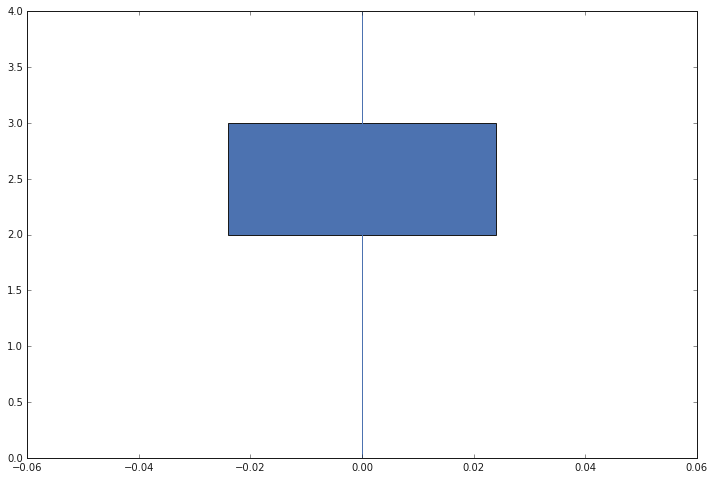

In [11]:
plt.figure(figsize=(12,8))
plt.axhline(color = 'red')
plt.axvline()
plt.axhline(4)
plt.autoscale()
plt.axhspan(ymin = 2,ymax=3,xmin=0.3,xmax=0.7)
plt.show()

### Handling dates
------------------------

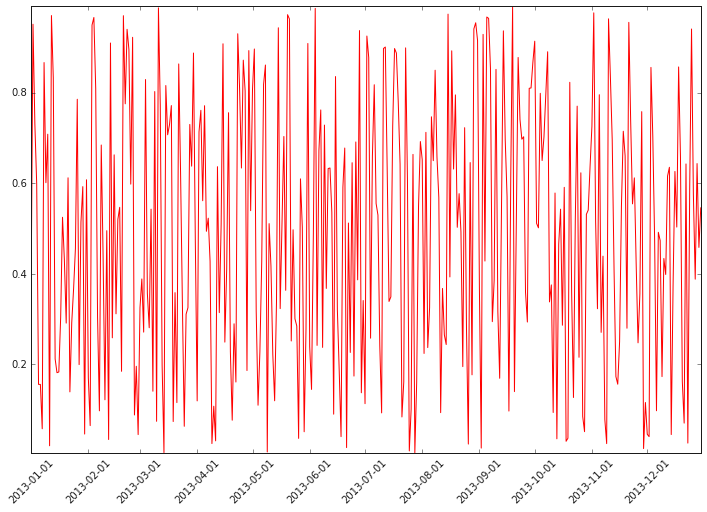

In [12]:
plt.figure(figsize=(12,8))
# get current axis
ax = plt.gca()
# set a datarange
start = dt.datetime(2013,1,1)
stop = dt.datetime(2013,12,31)
delta = dt.timedelta(days = 1)

#convert dates to matplotlib dates
dates = mpl.dates.drange(start,stop,delta)
values = np.random.rand(len(dates))
# set view to tight, and maximum number of ticks invervals to 10
ax.locator_params(tight = True)
# create plot with dates
ax.plot_date(dates,values, ls = '-', color = 'red',linewidth = 1,marker = '');
# specify formater
date_format = mpl.dates.DateFormatter('%Y-%m-%d')
# apply formatter
ax.xaxis.set_major_formatter(date_format)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

### Adding comments & Legengs 
-----------------------------------

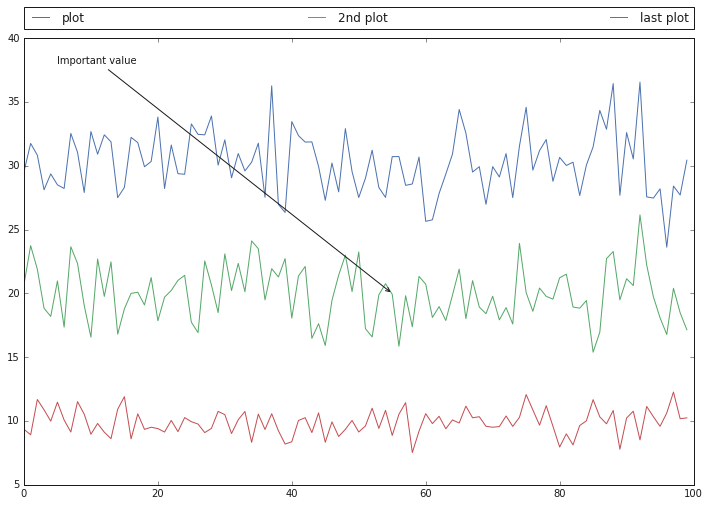

In [13]:
plt.figure(figsize=(12,8))

x1 = np.random.normal(30,3,100)
x2 = np.random.normal(20,2,100)
x3 = np.random.normal(10,1,100)

plt.plot(x1, label='plot')
plt.plot(x2, label='2nd plot')
plt.plot(x3, label='last plot')

# Generate legend box
plt.legend(bbox_to_anchor = (0,1.02,1,.102), loc = 3,ncol =3 ,mode= 'expand', borderaxespad =0)

# anotate an important value
plt.annotate('Important value',(55,20),xycoords = 'data',xytext =(5, 38),arrowprops =dict(arrowstyle ='->'))
plt.show()

### Graph look and feel
-----------------------------------------

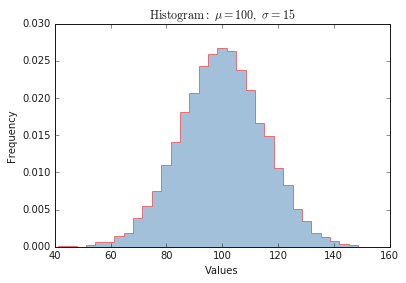

In [14]:
mu = 100
sigma = 15
sample = 10000
x = np.random.normal(mu,sigma,sample)

ax = plt.gca()
# the histogram of the data
ax.hist(x, bins=35, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

ax.set_title(r'$\mathrm{Histogram:}\ \mu=%d,\ \sigma=%d$' %(mu,sigma))

plt.show()

### Background formatting
---------------------

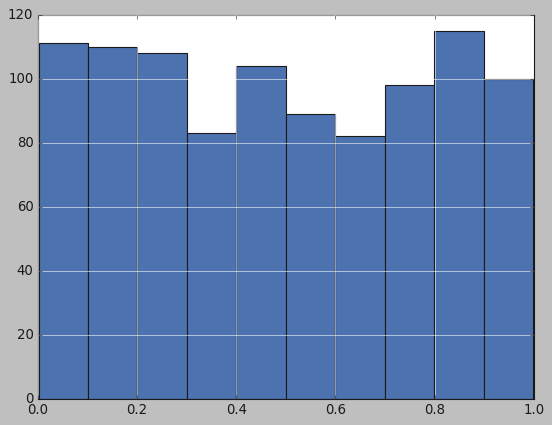

In [15]:
plt.style.use('classic')

x = np.random.rand(1000)
plt.hist(x)

# use a gray background
ax.set_facecolor('#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

### Detailed pie chart
--------------------

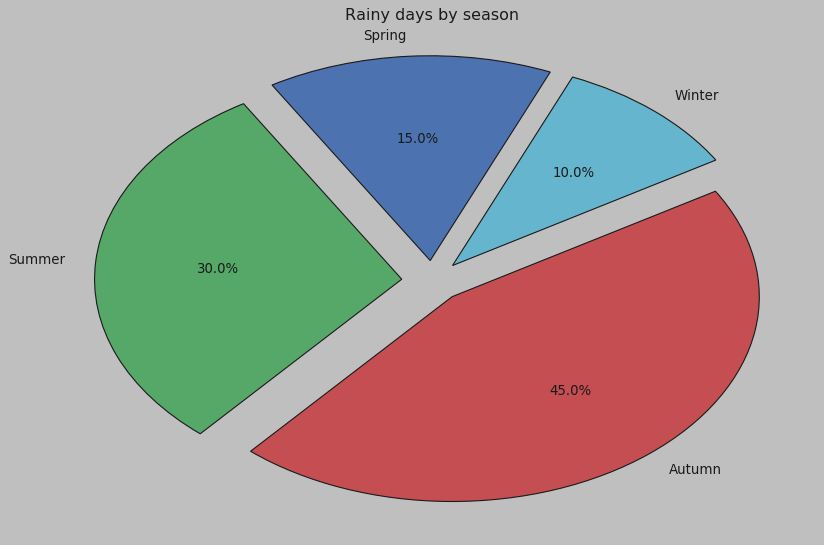

In [16]:
fig = plt.figure(num= 1,figsize=(12,8))
ax = plt.axes([.1,.1,.8,.8])

# the slices will be ordered
# and plotted counter - clockwise
labels = ['Spring', 'Summer', 'Autumn', 'Winter']

x = [15,30,45,10]

# explode must be onf len(x) or None
explode = [.1,.1,.1,.1]

plt.pie(x, explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67)
plt.title('Rainy days by season')
plt.show()

### Fill up area in between curves
--------------------------

In [17]:
x = np.arange(0,2,.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2 *np.sin(4*np.pi*x)

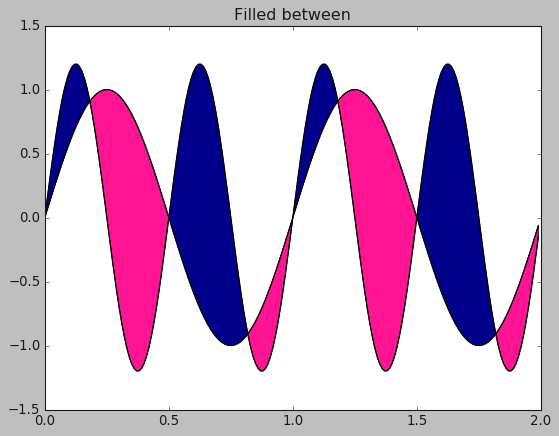

In [18]:
fig = plt.figure()
ax = plt.gca()

# plot and fill between y1 and y2 where the logical 
# condition is met

ax.plot(x,y1,x,y2, color = 'black');

ax.fill_between(x, y1,y2, where = y2>=y1, 
               facecolor = 'darkblue', interpolate = True)

ax.fill_between(x, y1,y2, where = y2<=y1, 
               facecolor = 'deeppink', interpolate = True)
ax.set_title('Filled between')

plt.show()

### Custom made charts
-----------------------------

In [19]:
df = pd.read_csv('ch03-energy-production.csv')

In [20]:
columns = ['Coal','Natural Gas (Dry)','Crude Oil','Nuclear Electric Power','Biomass Energy',
           'Hydroelectric Power','Natural Gas Plant Liquids','Wind Energy','Geothermal Energy','Solar/PV Energy']
colors = ['darkslategray','powderblue','darkmagenta','lightgreen',
          'sienna','royalblue','mistyrose','lavender','tomato','gold']

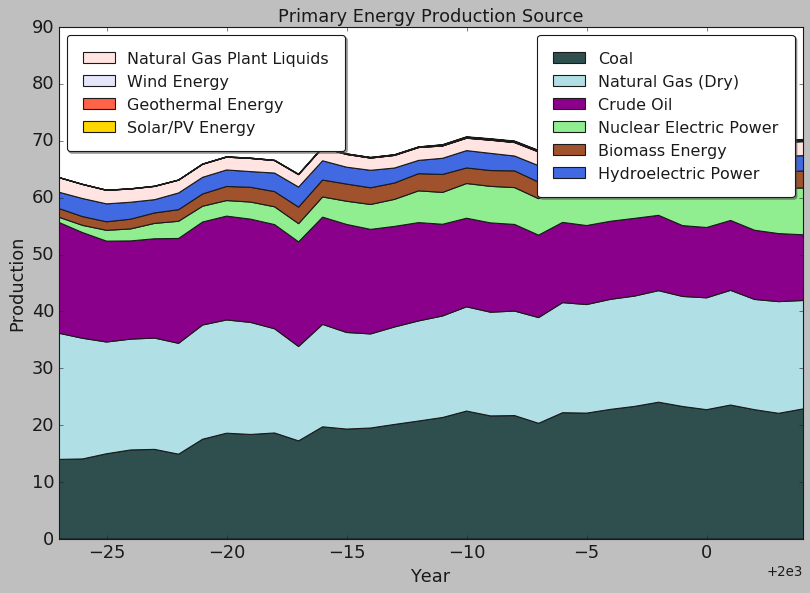

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
polys = plt.stackplot(df['Year'], df[columns].values.T, colors= colors, labels = columns)
lines=[]
from matplotlib.legend import Legend

ax.legend(polys[:6],columns[:6],loc='upper right', frameon = True, fancybox = True, framealpha = 1,
         shadow =True, borderpad = 1)

leg = Legend(ax, labels=columns[6:],handles=polys[6:],loc='upper left', frameon = True, fancybox = True, framealpha = 1, 
             shadow =True, borderpad = 1)
ax.add_artist(leg)

plt.title('Primary Energy Production Source', fontsize = 16)
plt.ylabel('Production',fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.xlim(1973,2004)
plt.show()